In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [24]:
path = '/content/drive/MyDrive/a.us.csv'
df = pd.read_csv(path)

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0


In [26]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4521 non-null   object 
 1   Open     4521 non-null   float64
 2   High     4521 non-null   float64
 3   Low      4521 non-null   float64
 4   Close    4521 non-null   float64
 5   Volume   4521 non-null   int64  
 6   OpenInt  4521 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 247.4+ KB


In [28]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03,4521.0
mean,27.856296,28.270442,27.452486,27.871357,3.993503e+06,0.0
std,12.940880,13.176000,12.711735,12.944389,2.665730e+06,0.0
min,7.223100,7.513900,7.087800,7.323800,0.000000e+00,0.0
25%,19.117000,19.435000,18.780000,19.089000,2.407862e+06,0.0
50%,24.456000,24.809000,24.159000,24.490000,3.460621e+06,0.0
75%,36.502000,37.046000,35.877000,36.521000,4.849809e+06,0.0
max,105.300000,109.370000,97.881000,107.320000,6.627751e+07,0.0


In [35]:
df.drop('day', axis = 1)

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,06-11-2017,68.220,68.450,68.220,68.220,995731,0
4517,07-11-2017,68.320,68.640,68.040,68.250,966466,0
4518,08-11-2017,68.100,68.330,67.771,68.110,972616,0
4519,09-11-2017,67.920,67.980,66.910,67.470,1673083,0


In [37]:
df.Date = pd.to_datetime(df.Date)

In [39]:
df['day'] = df.Date.dt.day
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [40]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,day,month,year
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0,18,11,1999
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0,19,11,1999
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0,22,11,1999
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0,23,11,1999
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0,24,11,1999


In [41]:
df.drop('Date', axis= 1)

,Open,High,Low,Close,Volume,OpenInt,day,month,year
0,30.713,33.754,27.002,29.702,66277506,0,18,11,1999
1,28.986,29.027,26.872,27.257,16142920,0,19,11,1999
2,27.886,29.702,27.044,29.702,6970266,0,22,11,1999
3,28.688,29.446,27.002,27.002,6332082,0,23,11,1999
4,27.083,28.309,27.002,27.717,5132147,0,24,11,1999
...,...,...,...,...,...,...,...,...,...
4516,68.220,68.450,68.220,68.220,995731,0,11,6,2017
4517,68.320,68.640,68.040,68.250,966466,0,11,7,2017
4518,68.100,68.330,67.771,68.110,972616,0,11,8,2017
4519,67.920,67.980,66.910,67.470,1673083,0,11,9,2017


Text(0, 0.5, 'Open')

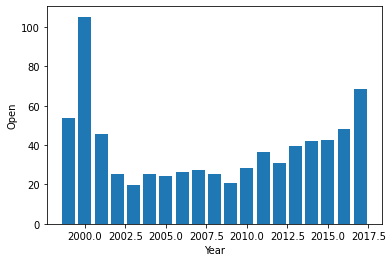

In [46]:
df.groupby('year').mean()
plt.bar(df.year, df.Open)
plt.xlabel('Year')
plt.ylabel('Open')

(array([ 875., 1820.,  706.,  756.,  181.,  120.,   45.,   11.,    3.,
           4.]),
 array([  7.2231 ,  17.03079,  26.83848,  36.64617,  46.45386,  56.26155,
         66.06924,  75.87693,  85.68462,  95.49231, 105.3    ]),
 <a list of 10 Patch objects>)

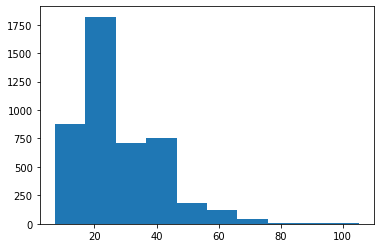

In [48]:
plt.hist(df.Open)

(array([ 909., 1821.,  731.,  739.,  144.,  132.,   30.,    9.,    3.,
           3.]),
 array([  7.3238 ,  17.32342,  27.32304,  37.32266,  47.32228,  57.3219 ,
         67.32152,  77.32114,  87.32076,  97.32038, 107.32   ]),
 <a list of 10 Patch objects>)

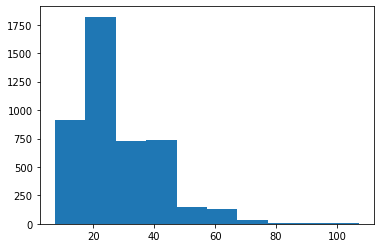

In [50]:
plt.hist(df.Close)

In [51]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'day',
       'month', 'year'],
      dtype='object')

In [55]:
cols = ['Open', 'High', 'Low', 'Close']


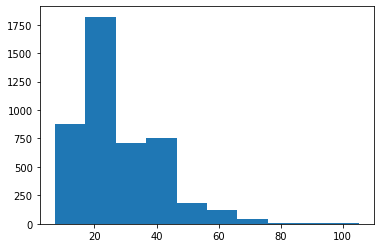

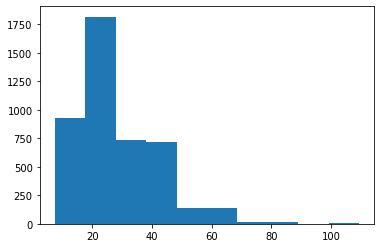

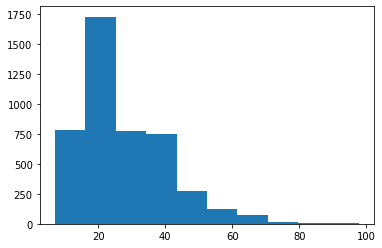

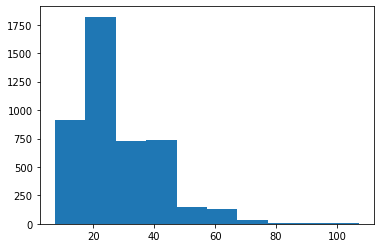

In [58]:
for i in cols:
  plt.figure(i)
  plt.hist(df[i])